# Import libraries and Dataset

In [2]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing dataset
dataset = pd.read_csv('crop_yield.csv')

# Descriptive Statistics

In [4]:
# Preview data
dataset.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [11]:
new = dataset[dataset['State_Name'] == 'Maharashtra']

In [12]:
new

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
125191,Maharashtra,AHMEDNAGAR,1997,Autumn,Maize,1.0,1113.0
125192,Maharashtra,AHMEDNAGAR,1997,Kharif,Arhar/Tur,17600.0,6300.0
125193,Maharashtra,AHMEDNAGAR,1997,Kharif,Bajra,274100.0,152800.0
125194,Maharashtra,AHMEDNAGAR,1997,Kharif,Gram,40800.0,18600.0
125195,Maharashtra,AHMEDNAGAR,1997,Kharif,Jowar,900.0,1100.0
...,...,...,...,...,...,...,...
137814,Maharashtra,YAVATMAL,2014,Rabi,Jowar,4000.0,3300.0
137815,Maharashtra,YAVATMAL,2014,Rabi,Maize,1300.0,200.0
137816,Maharashtra,YAVATMAL,2014,Rabi,Wheat,29100.0,26800.0
137817,Maharashtra,YAVATMAL,2014,Summer,Groundnut,9400.0,11500.0


In [13]:
np.unique(new['Crop'])

array(['Arhar/Tur', 'Bajra', 'Banana', 'Castor seed', 'Cotton(lint)',
       'Gram', 'Grapes', 'Groundnut', 'Jowar', 'Linseed', 'Maize',
       'Mango', 'Moong(Green Gram)', 'Niger seed', 'Onion',
       'Other  Rabi pulses', 'Other Cereals & Millets',
       'Other Kharif pulses', 'Pulses total', 'Ragi', 'Rapeseed &Mustard',
       'Rice', 'Safflower', 'Sesamum', 'Small millets', 'Soyabean',
       'Sugarcane', 'Sunflower', 'Tobacco', 'Tomato', 'Total foodgrain',
       'Urad', 'Wheat', 'other oilseeds'], dtype=object)

In [4]:
# Dataset dimensions - (rows, columns)
dataset.shape

(246091, 7)

In [5]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


# Data Visualization

<AxesSubplot:xlabel='Season', ylabel='count'>

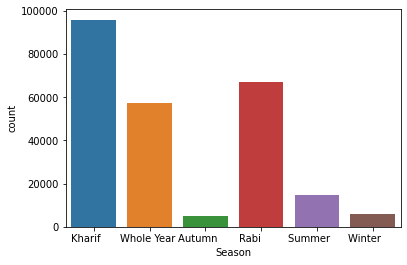

In [6]:
# Outcome countplot
sns.countplot(x = 'Season',data = dataset)

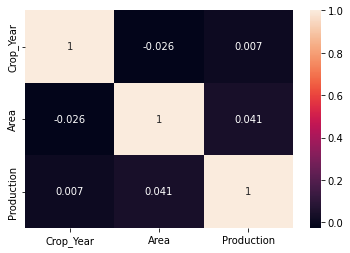

In [7]:
# Heatmap
sns.heatmap(dataset.corr(), annot = True)
plt.show()

# Data Preprocessing

In [8]:
dataset_new = dataset

In [9]:
# Count of NaN
dataset_new.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [10]:
# Replacing NaN with mean values
dataset_new["Area"].fillna(dataset_new["Area"].mean(), inplace = True)
dataset_new["Production"].fillna(dataset_new["Production"].mean(), inplace = True)

In [11]:
# # Feature scaling using MinMaxScaler
# dataset_new = dataset_new.drop('Crop_Year', axis=1)
# dataset_new = dataset_new.drop('District_Name', axis=1)

In [12]:
dataset_new.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [13]:
dataset_new_onehot = pd.get_dummies(dataset_new, columns=['State_Name', 'District_Name', 'Crop', 'Season'], prefix = ['State_name', 'District_Name', 'Crop', 'Season'])
dummy_cols = dataset_new_onehot.loc[:, dataset_new_onehot.columns != 'Production']
X=dataset_new_onehot.loc[:, dataset_new_onehot.columns != 'Production']
Y=dataset_new['Production']

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [15]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=5)

# Algorithms

In [16]:
from sklearn.ensemble import RandomForestRegressor

rf =RandomForestRegressor(n_estimators=10, max_depth=3, random_state=0)
rf.fit(X_train , Y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

In [17]:
from sklearn.tree import DecisionTreeRegressor

dtr =DecisionTreeRegressor()
dtr.fit(X_train , Y_train)  

DecisionTreeRegressor()

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gbr =GradientBoostingRegressor(n_estimators=10, max_depth=3, random_state=0)
gbr.fit(X_train , Y_train) 

GradientBoostingRegressor(n_estimators=10, random_state=0)

In [19]:
# Making predictions on test dataset

Y_pred_rf = rf.predict(X_test)
Y_pred_dtr = dtr.predict(X_test)
Y_pred_gbr = gbr.predict(X_test)

# Model Evaluation

In [20]:
from sklearn.metrics import r2_score

accuracy_rf = r2_score(Y_test, Y_pred_rf)
accuracy_dtr = r2_score(Y_test, Y_pred_dtr)
accuracy_gbr = r2_score(Y_test, Y_pred_gbr)

In [21]:
# Accuracy on test set

print("RandomForestRegressor: " + str(accuracy_rf * 100))
print("DecisionTreeRegressor: " + str(accuracy_dtr * 100))
print("GradientBoostingRegressor: " + str(accuracy_gbr * 100))

RandomForestRegressor: 75.2665550169337
DecisionTreeRegressor: 92.8262250755934
GradientBoostingRegressor: 67.99119917574899
